In [1]:
# Import common python libraries
import numpy as np
import pandas as pd

# For optimization
from scipy import optimize as opt

# Import functions from utils
from utils import save_fig
from utils import plot_dataset
from utils import lr_decision_boundary
from utils import feature_standardise 
from utils import cost_function
from utils import hypothesis
from utils import classify
from utils import sigmoid
from utils import predict
from utils import plot_decision_boundary

# Matplotlib for plotting figures
import matplotlib as mpl
import matplotlib.pyplot as plt

# ignoring Numpy errors
np.seterr(all = 'ignore')

%matplotlib inline

In [2]:
dataset = pd.read_csv('datasets/gen_dataset.csv',header=0,names=['ID', 'rpm', 'vibrations', 'status'])

print('\nNumber of records:',len(dataset))
print('\nclass domain:', dataset['status'].unique())
print('\n\n',dataset.head())


Number of records: 56

class domain: [0 1]


    ID  rpm  vibrations  status
0   1  568         585       0
1   2  586         565       0
2   3  609         536       0
3   4  616         492       0
4   5  632         465       0


In [3]:
X = pd.DataFrame(dataset,columns=['rpm','vibrations']).values
y = dataset['status'].values
print('The shape of X:',X.shape)
print('The shape of y:',y.shape)

The shape of X: (56, 2)
The shape of y: (56,)


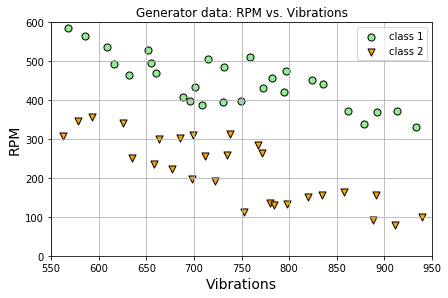

In [4]:
plt.figure(1)
plt.title('Generator data: RPM vs. Vibrations')
plot_dataset(X,y)
plt.xlabel("Vibrations", fontsize=14)
plt.ylabel("RPM", fontsize=14)
plt.axis([550,950,0.0,600])
plt.grid(True)
plt.legend()
plt.show()

In [5]:
# Initial Settings
num_iters = 500
theta = np.zeros((X.shape[1]+1, 1)); # initialize fitting parameters to zeros
Xnorm, Xmu, Xrange = feature_standardise(X)
Xnew = np.c_[np.ones((X.shape[0], 1)), Xnorm]; # Add a column of ones to x for x0 = 1

In [6]:
cost = cost_function(theta, Xnew, y) # Calling the logistic cost function
print('\nInitial Cost: %f' % (cost) + ', Theta: ' + str(theta[:,0]))


Initial Cost: 0.693147, Theta: [0. 0. 0.]


In [7]:
def fit(func, theta,x,y,iters):
    result = opt.fmin(func=func, x0=theta, args=(x,y),maxiter=iters, full_output=1)
    return result[0], result[1]

In [8]:
theta,cost = fit(cost_function,theta,Xnew,y, num_iters)
print('\nResults (found by fmin):\nMinimum point: '\
      + str(theta) + ', Cost: %.5f' % (cost));

Optimization terminated successfully.
         Current function value: 0.000338
         Iterations: 286
         Function evaluations: 525

Results (found by fmin):
Minimum point: [  1.33799071 -24.47123027 -82.94004246], Cost: 0.00034


In [9]:
Xtest = np.array([[810,495]])
Xtest = (Xtest-Xmu)/Xrange
print(Xtest)
Xtest = np.c_[1, Xtest]
Ytest = classify(Xtest,theta)
print("Status:",Ytest)

[[0.18207654 0.3190288 ]]
Status: Good


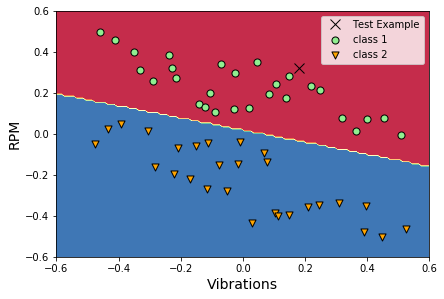

In [10]:
plt.figure(2)
#plot_decision_boundary(Xnew[:,1:],y, theta)
lr_decision_boundary(Xnew[:,1:],theta)
plot_dataset(Xnew[:,1:],y)
plt.plot(0.182,0.319,'x', color='black', markersize=10, label="Test Example")
plt.xlabel("Vibrations", fontsize=14)
plt.ylabel("RPM", fontsize=14)
plt.axis([-0.6,0.6,-0.6,0.6])
plt.legend()
plt.show()